# Explore here

In [1]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [3]:
total_data.shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We have 8 numerical variables and 8 categoricals. 
Also the last_ review and reviews_per_month has 38,843 records, 10,052 less than the other variables.

We look for the duplicated ids


In [4]:
id_duplicates = total_data['id'].duplicated().sum()
print(f"The id duplicates is: {id_duplicates}")
name_duplicates = total_data['name'].duplicated().sum()
print(f"The name duplicates is: {name_duplicates}")
hostid_duplicates = total_data['host_id'].duplicated().sum()
print(f"The host id duplicates is: {hostid_duplicates}")

The id duplicates is: 0
The name duplicates is: 989
The host id duplicates is: 11438


We eliminate the duplicates



In [5]:
total_data.drop("host_id", axis= 1).duplicated().sum()

np.int64(0)

Eliminate the varaibles that are irrelevant

In [6]:
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month", "latitude", "longitude"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


Categoric Variables Analysis

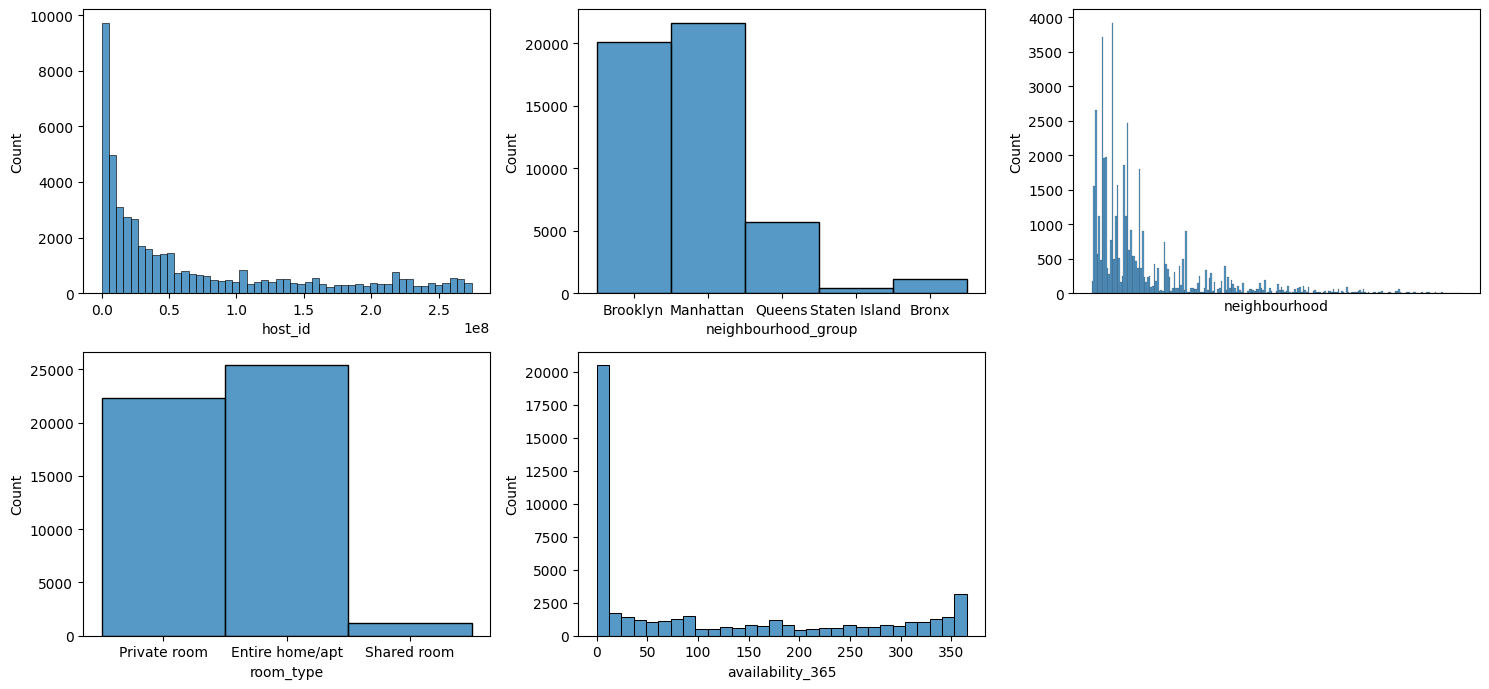

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(15, 7))

sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

plt.tight_layout()
plt.show()

We can see that there are a lot of host_id missing. The neighborhoods in the graph showsthat there is more demand in Manhattan and brooklyn that in any other area of NY. There are more Entire places to rent and private rooms than shared rooms. Finally there is a lot of avalability in 0 in the Data Set which can mean that is an error. 

Numeric Variables Analysis

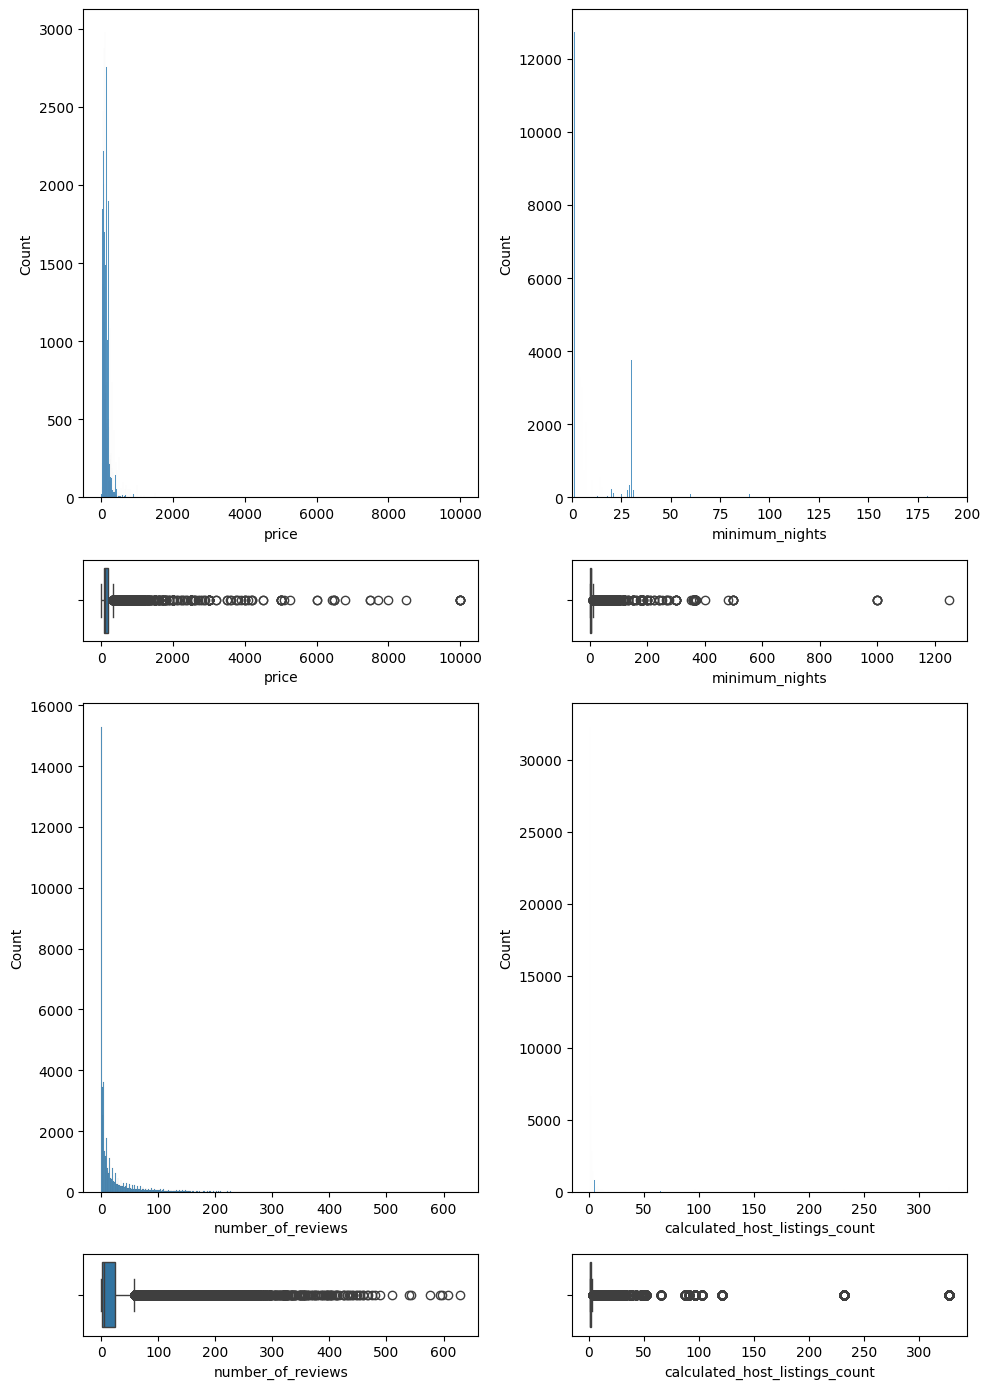

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

plt.tight_layout()
plt.show()

We can see that most of the places the night is within the range of $100 and some above $200. However there is an error in the data given that there is a spike within the $0 range. Also we can see the same error in the number of reviews and minimum nights. 
The minimum nights in average in NY are above 25 nights.

Numerical-Numerical Analysis

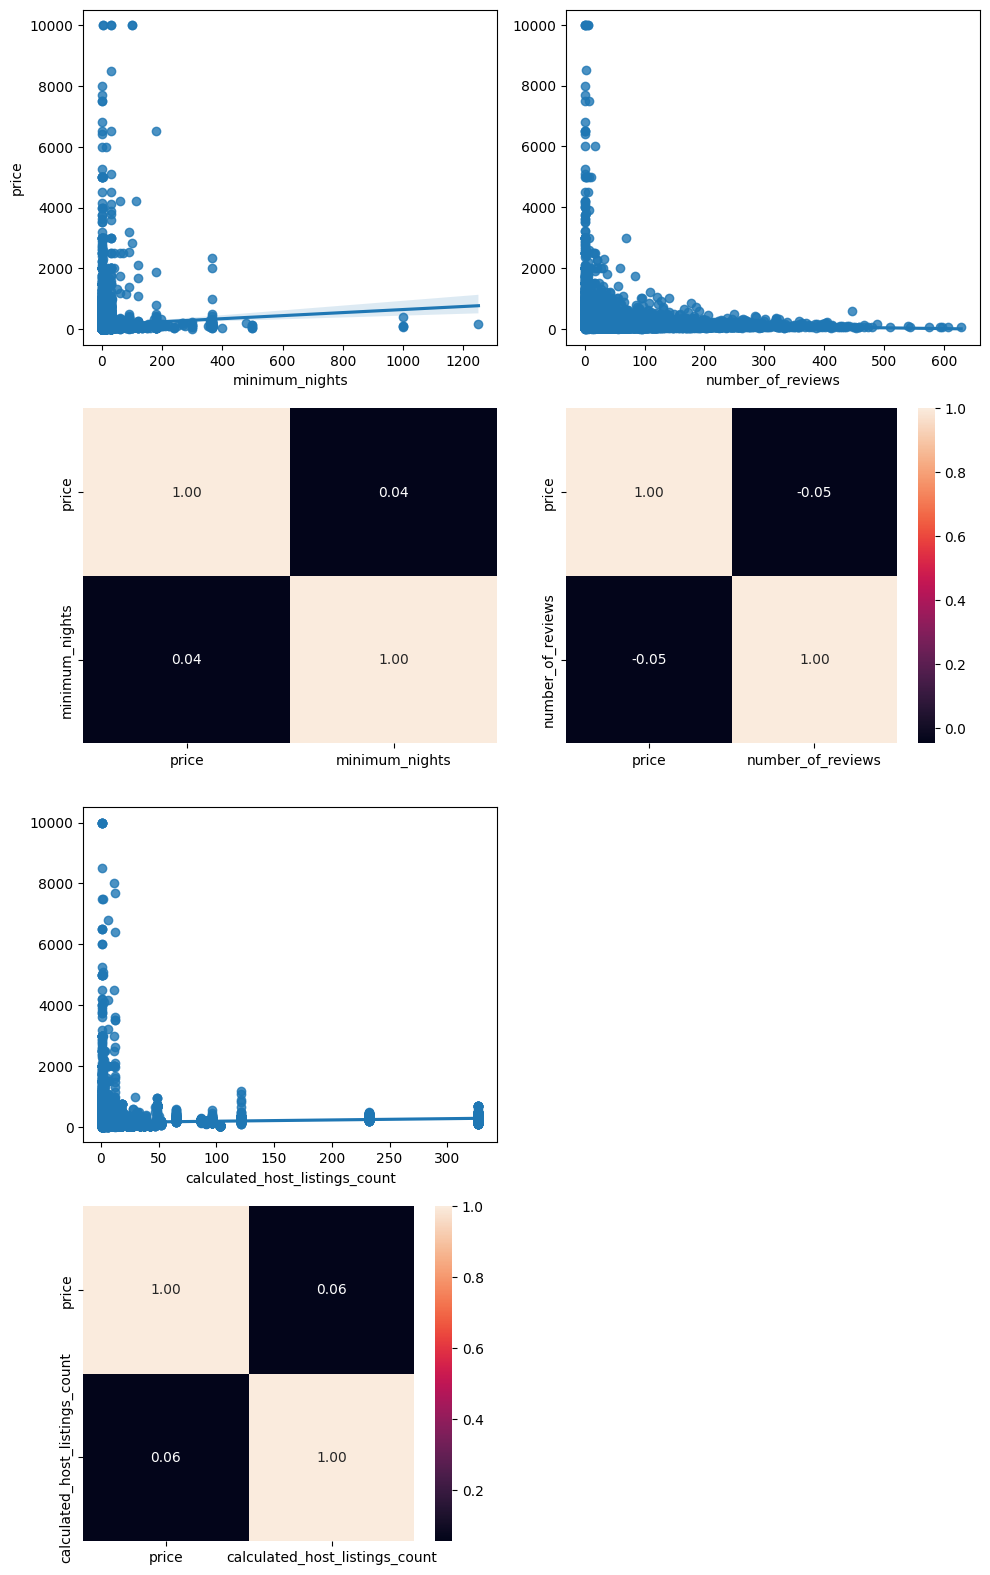

In [9]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()
plt.show()

We can see that none of the liste variables above has a corelation with the price.

Categorical-Categorical Analysis

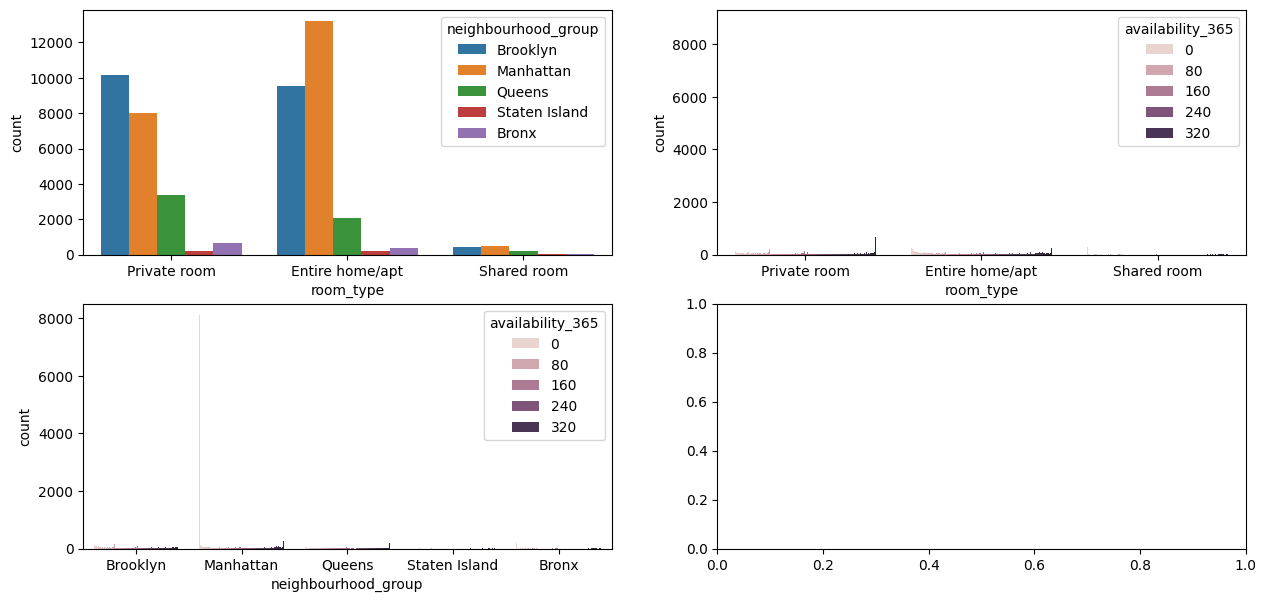

In [10]:
fig, axis = plt.subplots(2,2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "room_type", hue = "neighbourhood_group")
sns.countplot(ax = axis[0, 1], data = total_data, x = "room_type", hue = "availability_365")
sns.countplot(ax = axis[1, 0], data = total_data, x = "neighbourhood_group", hue = "availability_365")
plt.show()

We can see that Manhattan has more entire places to rent,Brooklyn the most private rooms to rent, and the sahred rooms are too low compared to this categories, but still Manhattan and Brooklyn are the more rented. 
We can also see that there are a little bit more availability in Manhattan and more private rooms to rent in the entire year.

Numerical - Categorical Analysis

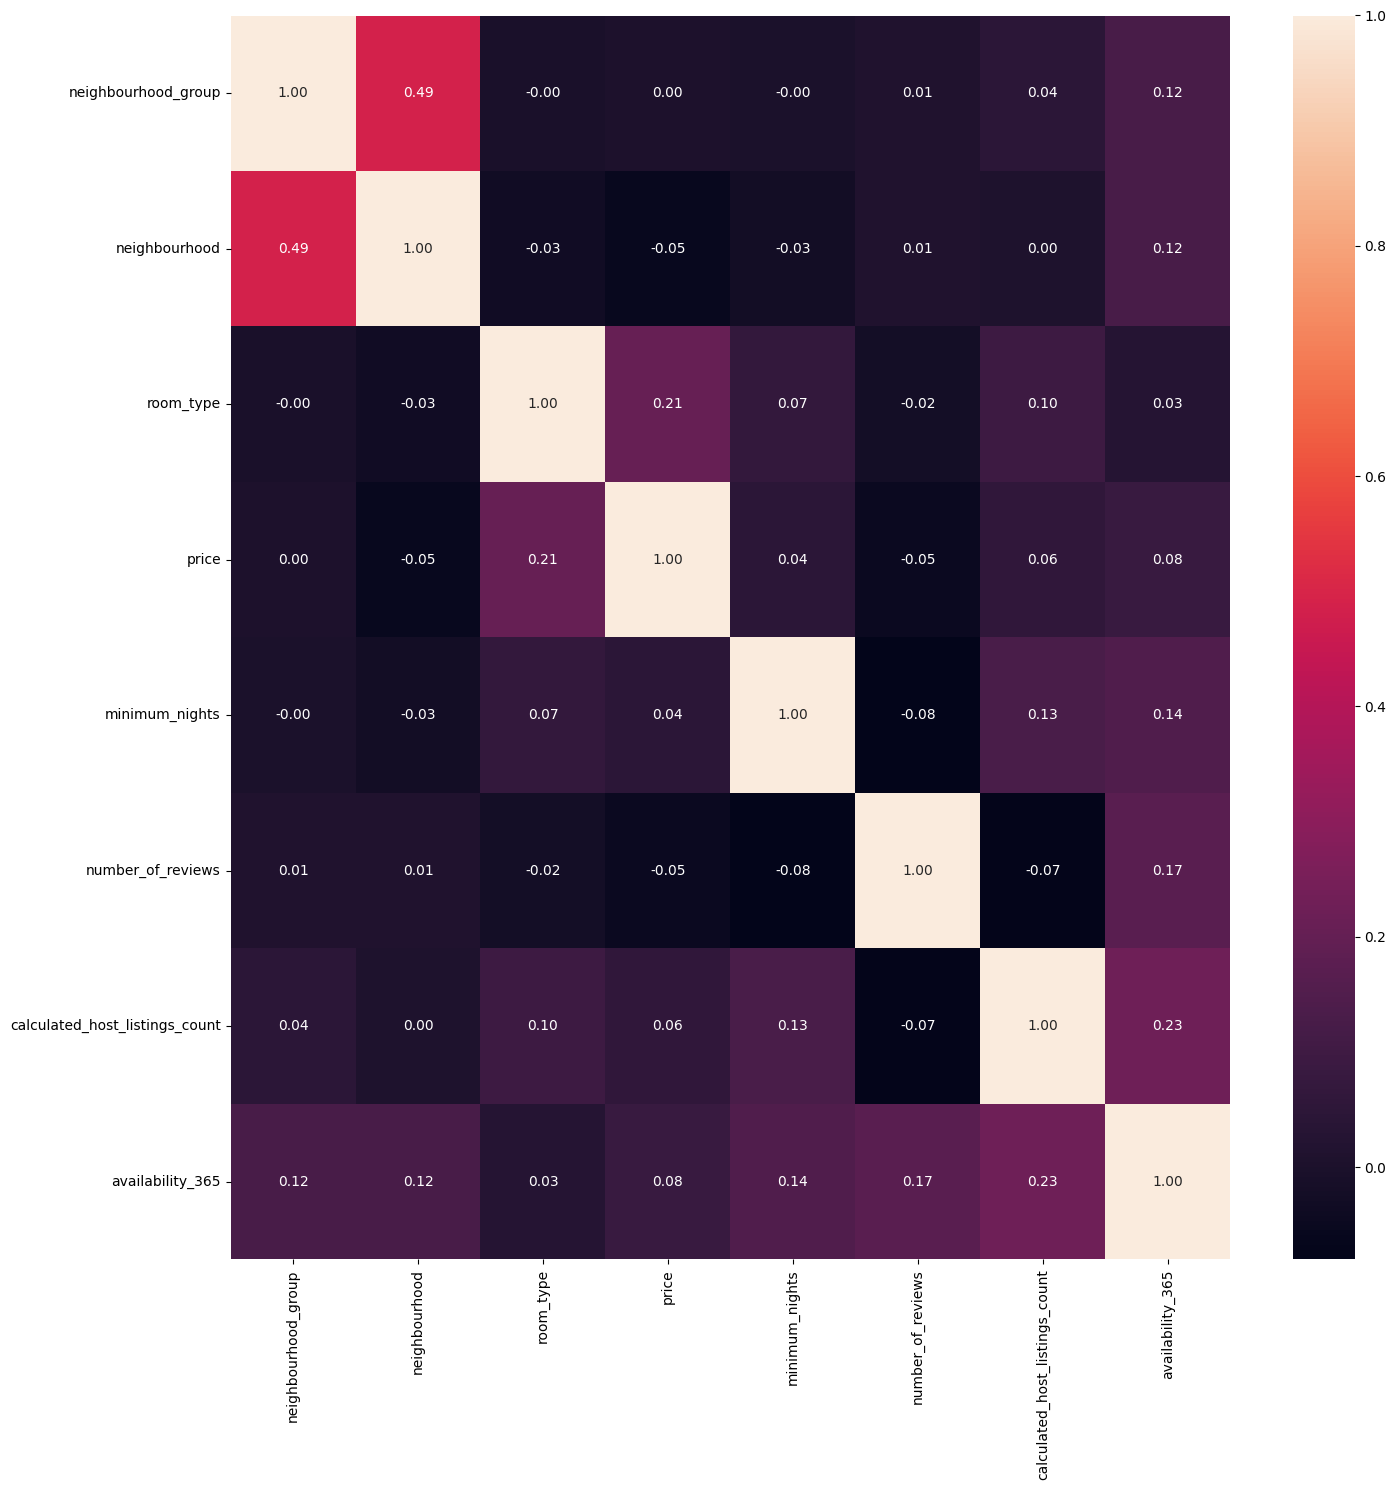

In [11]:
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

We can see that there is no relation between the variables listed.

All Data Analysis

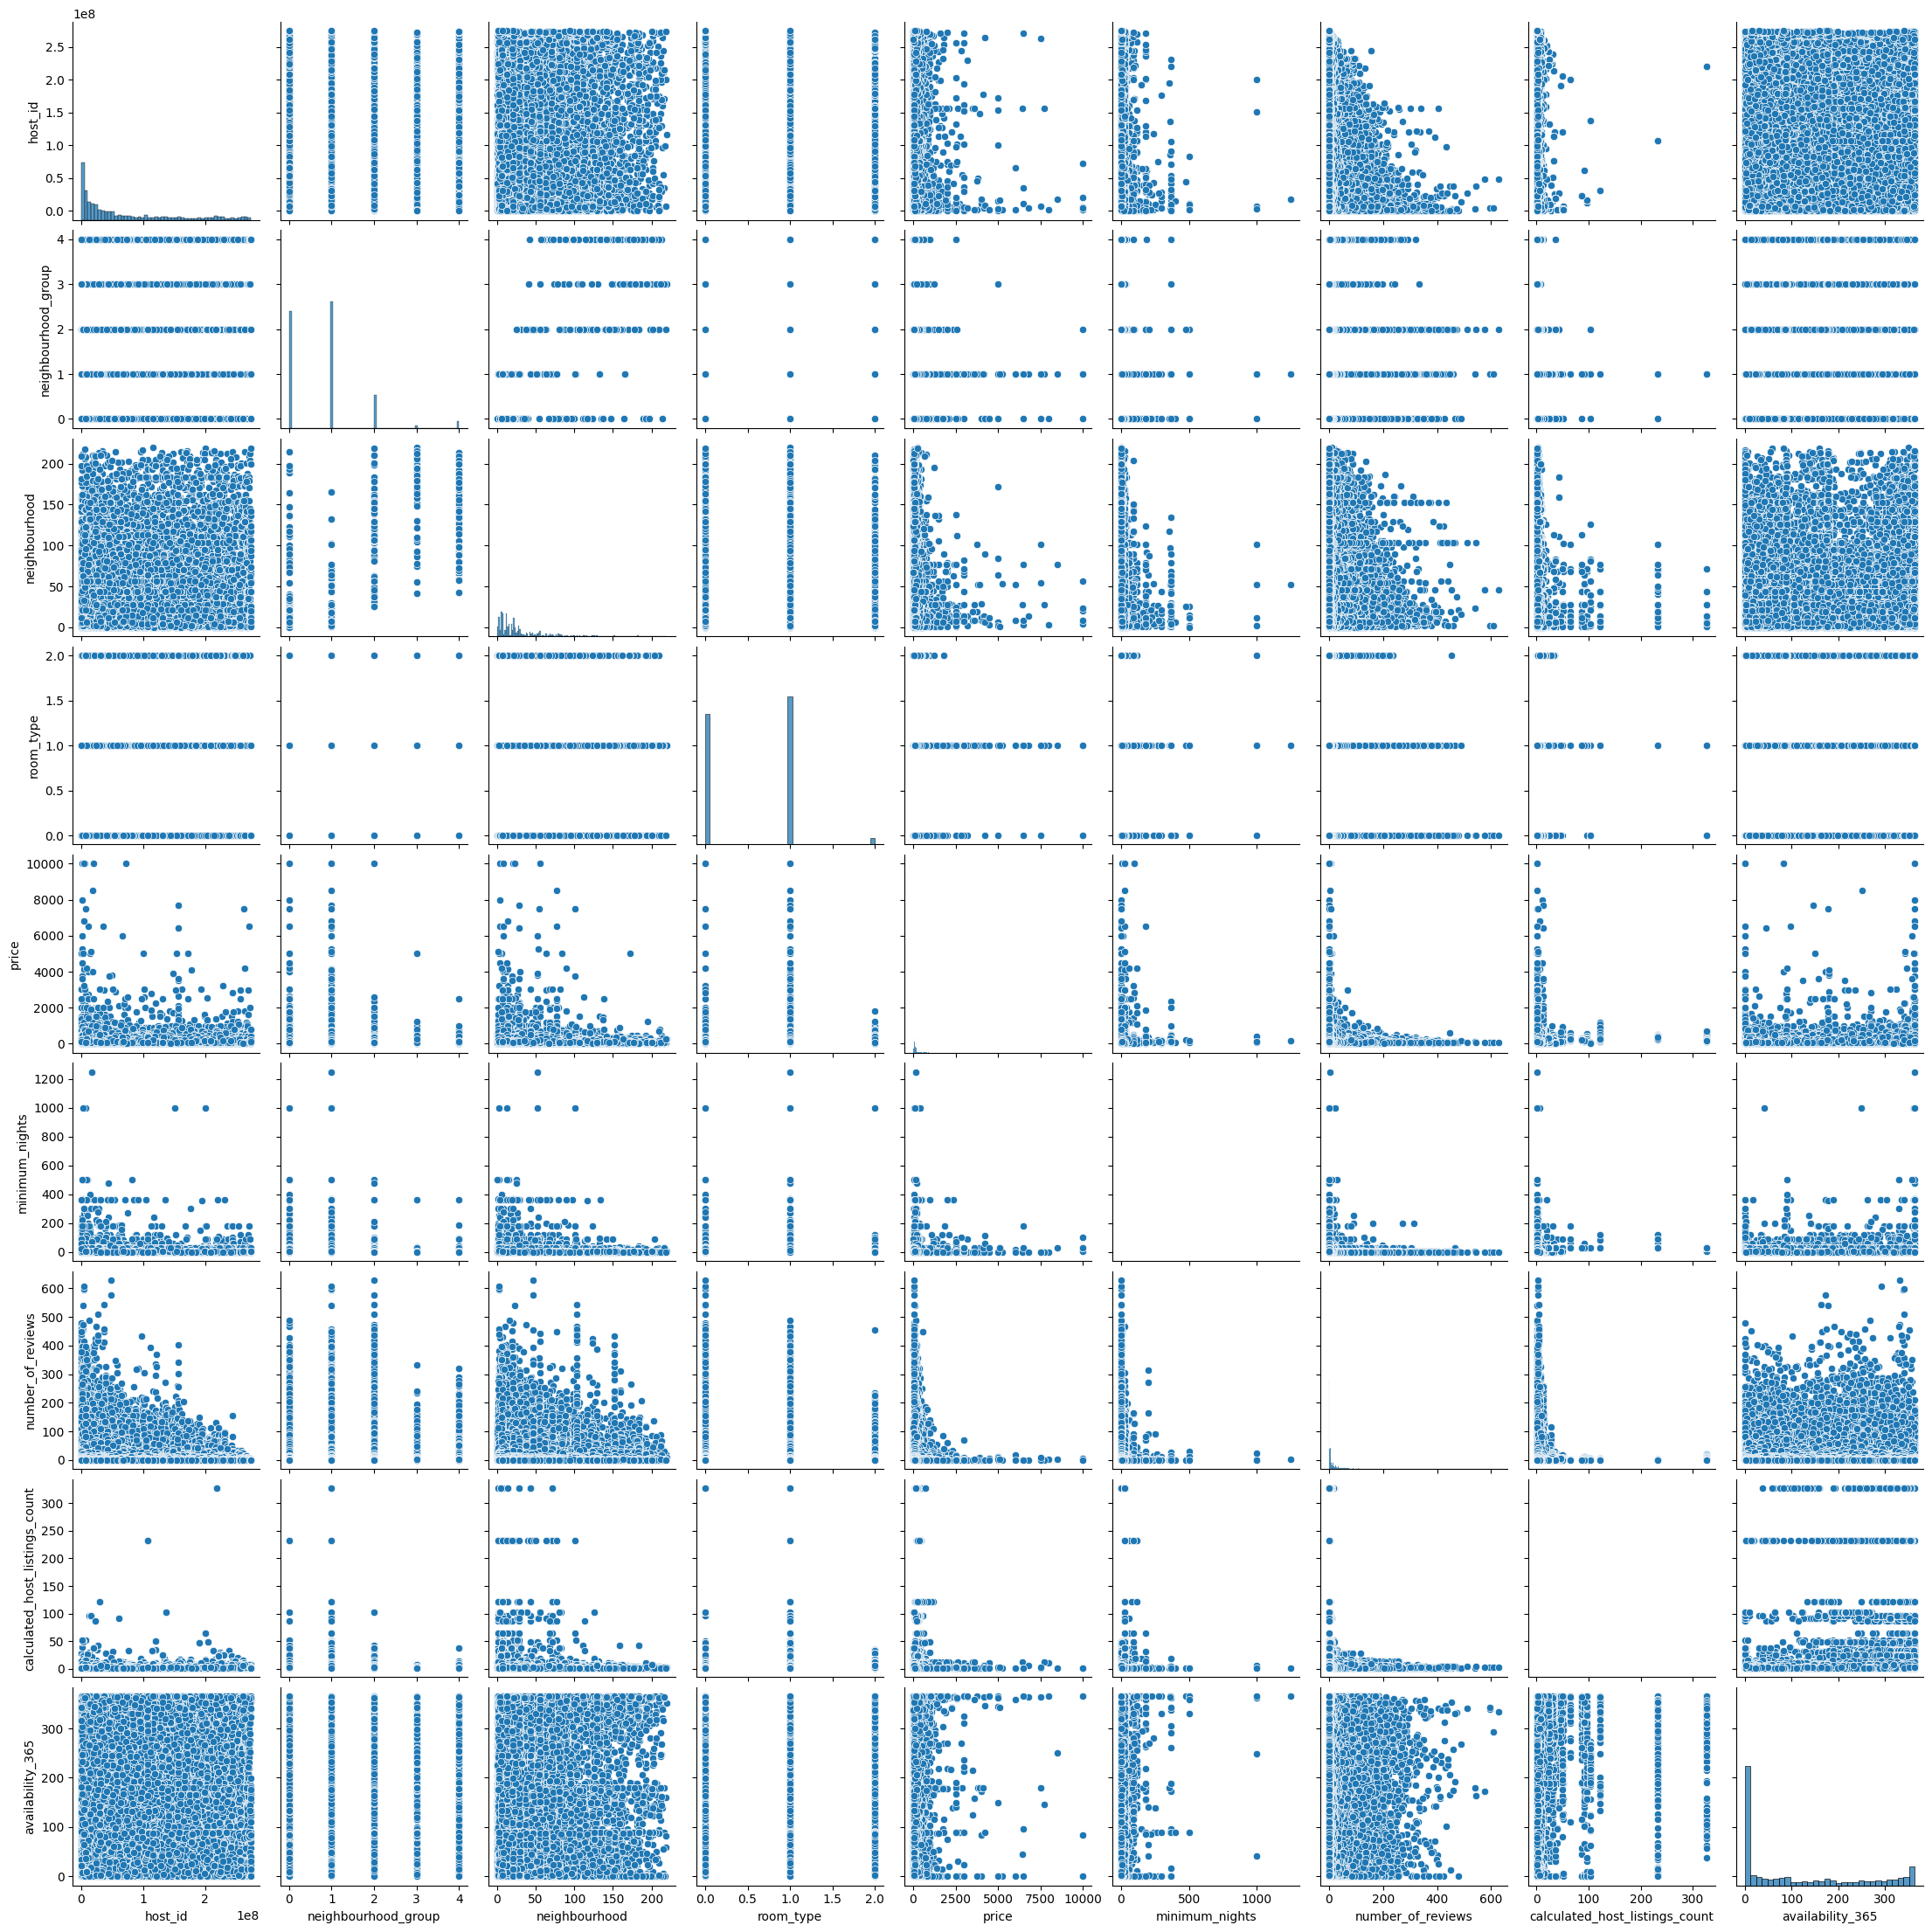

In [12]:
sns.pairplot(data = total_data)



Feature Engineering

Outlier Analysis

In [14]:
total_data.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


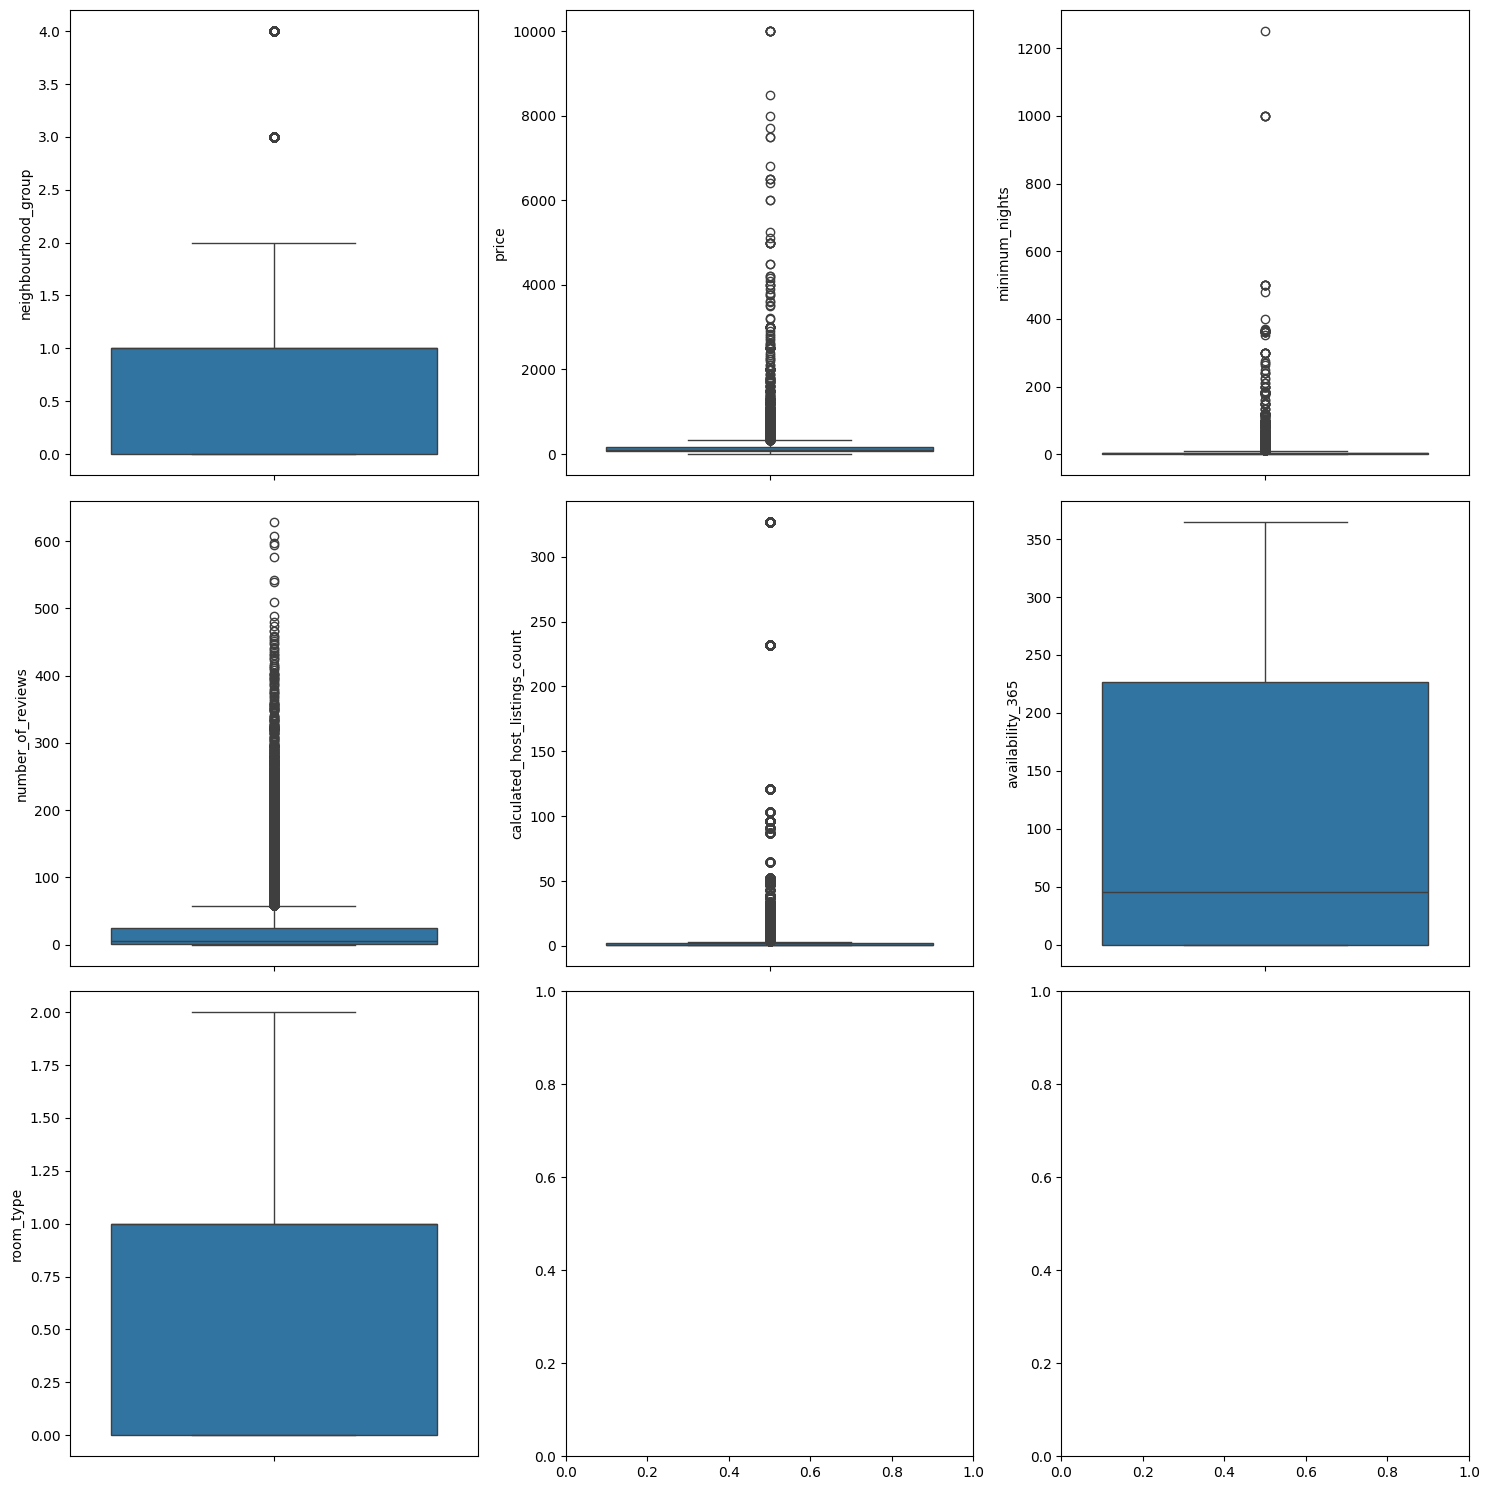

In [15]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()
plt.show()

Outlier dectection for the variable "price"

In [16]:
price_statistics = total_data["price"].describe()
price_statistics

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
price_iqr = price_statistics["75%"] - price_statistics["25%"]
upper_limit = price_statistics["75%"] + 1.5 * price_iqr
lower_limit = price_statistics["25%"] - 1.5 * price_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper limit for finding outliers is 334.0 and the lower limit is -90.0, with an interquartile range of 106.0


In [18]:
total_data = total_data[total_data["price"] > 0]

In [19]:
count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


Outlier detection for the variable "minimum nights"

In [20]:
nights_statistics = total_data["minimum_nights"].describe()
nights_statistics

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [21]:
nights_iqr = nights_statistics["75%"] - nights_statistics["25%"]

upper_limit = nights_statistics["75%"] + 1.5 * nights_iqr
lower_limit = nights_statistics["25%"] - 1.5 * nights_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper limit for finding outliers is 11.0 and the lower limit is -5.0, with an interquartile range of 4.0


In [22]:
total_data = total_data[total_data["minimum_nights"] <= 15]

count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


Outlier for the variable "number of reviews"

In [23]:
review_statistics = total_data["number_of_reviews"].describe()
review_statistics

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [24]:
review_iqr = review_statistics["75%"] - review_statistics["25%"]

upper_limit = review_statistics["75%"] + 1.5 * review_iqr
lower_limit = review_statistics["25%"] - 1.5 * review_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper limit for finding outliers is 66.0 and the lower limit is -38.0, with an interquartile range of 26.0


Outlier for the variable "Calculated host listing count"

In [25]:
hostlist_statistics = total_data["calculated_host_listings_count"].describe()
hostlist_statistics

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [26]:
hostlist_iqr = hostlist_statistics["75%"] - hostlist_statistics["25%"]

upper_limit = hostlist_statistics["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_statistics["25%"] - 1.5 * hostlist_iqr

print(f"The upper limit for finding outliers is {round(upper_limit, 2)} and the lower limit is {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper limit for finding outliers is 3.5 and the lower limit is -0.5, with an interquartile range of 1.0


In [27]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [28]:
total_data = total_data[total_data["calculated_host_listings_count"] > 4]

Missing Values Analysis

In [30]:
total_data.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scaler_features = scaler.fit_transform(total_data[num_variables])
df_scaler = pd.DataFrame(scaler_features, index = total_data.index, columns = num_variables)
df_scaler["price"] = total_data["price"]
df_scaler.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.003106,1.000000,0.0,0.0,149
21,0.239411,0.071429,0.003106,0.950685,0.0,0.0,130
22,0.071823,0.000000,0.003106,0.997260,0.0,0.0,80
23,0.130755,0.071429,0.003106,0.832877,0.0,0.0,110
92,0.029466,0.428571,0.003106,0.506849,0.0,0.0,98


Feature Selection

In [33]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scaler.drop("price", axis = 1)
y = df_scaler["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [34]:
selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.846575,0.0
1,0.071429,1.000000,0.169863,0.5
2,0.071429,0.000000,1.000000,0.0
3,0.428571,0.130435,0.926027,0.0
4,0.071429,1.000000,0.778082,0.5


Save Raw Data

In [35]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)